# K Means Clustering
## Problem Statement
### A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.
### Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

### 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### 2. Importing Data

In [2]:
df=pd.read_excel('cust_data.xlsx')

### 3. EDA

In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
Cust_ID,1,2,3,4,5,6,7,8,9,10,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
Gender,M,F,M,F,NaN,F,F,M,F,F,...,M,F,M,F,M,M,M,M,M,F
Orders,7,0,7,0,10,4,6,9,1,0,...,0,4,7,0,2,0,1,0,0,3
Jordan,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,1,0,0,0,0,2
Gatorade,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
Samsung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asus,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Udis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mondelez International,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Wrangler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.sample(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
19118,19119,F,5,0,0,0,2,0,0,0,...,0,2,0,0,0,0,0,0,0,0
20145,20146,F,8,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,0,0
12393,12394,F,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2819,2820,F,10,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
19906,19907,M,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25315,25316,F,9,0,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,0
22886,22887,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5436,5437,M,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
26543,26544,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7637,7638,NaN,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [5]:
df.keys()

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

### Clothes
'Jordan', 'Wrangler','Vans', 'Fila','Brooks','H&M','Fendi'
### Food
'Gatorade', 'Udis','Mondelez International','Dairy Queen'
### Electronics
'Samsung', 'Asus','Hewlett Packard'

In [6]:
df.drop(['Cust_ID'],axis=1,inplace=True) ### Since Customer ID is same as row no. and not important to calculation

In [7]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(30000, 37)

### Checking for null Values

In [9]:
df.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

### Gender Column has 2724 NULL Values so we are going to change the null values using mode of the Column


In [10]:
df.mode()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [19]:
print('Column','  -   Missing Values Count   -  ','Percentage of Missing Values')
for i in df.columns:
    print(i, df[i].isnull().sum(), [df[i].isnull().sum() * 100/30000])

Column   -   Missing Values Count   -   Percentage of Missing Values
Gender 2724 [9.08]
Orders 0 [0.0]
Jordan 0 [0.0]
Gatorade 0 [0.0]
Samsung 0 [0.0]
Asus 0 [0.0]
Udis 0 [0.0]
Mondelez International 0 [0.0]
Wrangler 0 [0.0]
Vans 0 [0.0]
Fila 0 [0.0]
Brooks 0 [0.0]
H&M 0 [0.0]
Dairy Queen 0 [0.0]
Fendi 0 [0.0]
Hewlett Packard 0 [0.0]
Pladis 0 [0.0]
Asics 0 [0.0]
Siemens 0 [0.0]
J.M. Smucker 0 [0.0]
Pop Chips 0 [0.0]
Juniper 0 [0.0]
Huawei 0 [0.0]
Compaq 0 [0.0]
IBM 0 [0.0]
Burberry 0 [0.0]
Mi 0 [0.0]
LG 0 [0.0]
Dior 0 [0.0]
Scabal 0 [0.0]
Tommy Hilfiger 0 [0.0]
Hollister 0 [0.0]
Forever 21 0 [0.0]
Colavita 0 [0.0]
Microsoft 0 [0.0]
Jiffy mix 0 [0.0]
Kraft 0 [0.0]


In [20]:
df['Gender'].fillna('F',inplace=True)

In [21]:
for i in df.columns:
    print(i, df[i].isnull().sum(), [df[i].isnull().sum() * 100/30000])

Gender 0 [0.0]
Orders 0 [0.0]
Jordan 0 [0.0]
Gatorade 0 [0.0]
Samsung 0 [0.0]
Asus 0 [0.0]
Udis 0 [0.0]
Mondelez International 0 [0.0]
Wrangler 0 [0.0]
Vans 0 [0.0]
Fila 0 [0.0]
Brooks 0 [0.0]
H&M 0 [0.0]
Dairy Queen 0 [0.0]
Fendi 0 [0.0]
Hewlett Packard 0 [0.0]
Pladis 0 [0.0]
Asics 0 [0.0]
Siemens 0 [0.0]
J.M. Smucker 0 [0.0]
Pop Chips 0 [0.0]
Juniper 0 [0.0]
Huawei 0 [0.0]
Compaq 0 [0.0]
IBM 0 [0.0]
Burberry 0 [0.0]
Mi 0 [0.0]
LG 0 [0.0]
Dior 0 [0.0]
Scabal 0 [0.0]
Tommy Hilfiger 0 [0.0]
Hollister 0 [0.0]
Forever 21 0 [0.0]
Colavita 0 [0.0]
Microsoft 0 [0.0]
Jiffy mix 0 [0.0]
Kraft 0 [0.0]


In [22]:
df.isnull().sum()

Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [43]:
# sorting variables based on null values
# 'ascending = False' sorts values in the descending order
Total = df.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)   

# create a dataframe using 'concat' function 
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Gender,0,0.0
J.M. Smucker,0,0.0
Juniper,0,0.0
Huawei,0,0.0
Compaq,0,0.0
IBM,0,0.0
Burberry,0,0.0
Mi,0,0.0
LG,0,0.0
Dior,0,0.0


### Distribution Of Orders Placed by Customers

<Figure size 5760x5760 with 0 Axes>

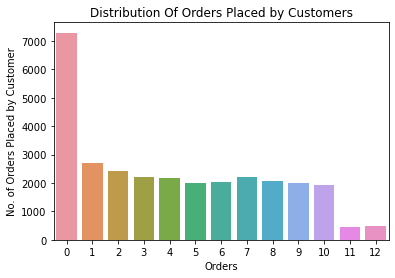

<Figure size 5760x5760 with 0 Axes>

In [23]:
sns.countplot(x=df.Orders,data=df)
plt.xlabel('Orders')
plt.ylabel('No. of Orders Placed by Customer')
plt.title('Distribution Of Orders Placed by Customers')
plt.figure(figsize=(80,80))

### Distribution Of Orders Placed by Customers By Gender

<Figure size 5760x5760 with 0 Axes>

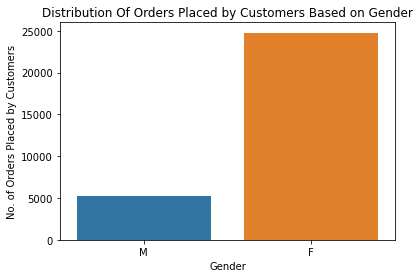

<Figure size 5760x5760 with 0 Axes>

In [24]:
sns.countplot(x=df.Gender,data=df)
plt.xlabel('Gender')
plt.ylabel('No. of Orders Placed by Customers')
plt.title('Distribution Of Orders Placed by Customers Based on Gender')
plt.figure(figsize=(80,80))

<function matplotlib.pyplot.show(close=None, block=None)>

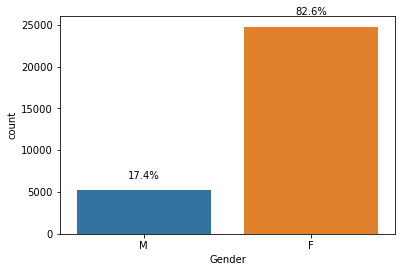

In [25]:
total=float(len(df))
a=sns.countplot(data=df,x="Gender")
for p in a.patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    a.annotate(percentage,(x,y),ha='center')
plt.show

### Discriptive Statistics On Gender

In [26]:
df.describe(include='object').transpose()

,count,unique,top,freq
Gender,30000,2,F,24778


In [27]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Selection

In [35]:
df_Crop=df.drop(['Gender','Orders'],axis=1)

In [36]:
df_Crop_C=df_Crop
df_Crop

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling Data Standard Scaler

In [37]:
SS = StandardScaler().fit(df_Crop)

In [38]:
df_Crop=SS.transform(df_Crop)

In [44]:
df_Crop_Scaled=pd.DataFrame(data=df_Crop,columns=df_Crop_C.columns)

In [45]:
df_Crop_Scaled

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


### K Means Clustering with Multiple Values of K

In [46]:
# create a list for different values of K
n_clusters = [2,3,4,5,6,7,8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_Crop_Scaled)
    
    score = silhouette_score(df_Crop_Scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.4260538191557415)
For n_clusters = 3, silhouette score is 0.29026216981969477)
For n_clusters = 4, silhouette score is 0.28882936660509695)
For n_clusters = 5, silhouette score is 0.2734507732644251)
For n_clusters = 6, silhouette score is 0.21945733520583072)
For n_clusters = 7, silhouette score is 0.2038118827349176)
For n_clusters = 8, silhouette score is 0.19969011593383135)


### K Means Using Elbow Method

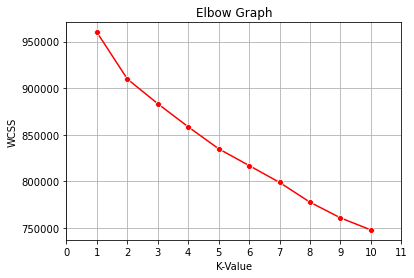

In [56]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df_Crop_Scaled.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

### We Select 3 Clusters

In [49]:
# building a K-Means model for K = 3
model = KMeans(n_clusters= 3, random_state= 10)

# fit the model
model.fit(df_Crop_Scaled)

KMeans(n_clusters=3, random_state=10)

In [51]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,F,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,F,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [52]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)   

(array([0, 1, 2]), array([ 1278,  5453, 23269], dtype=int64))

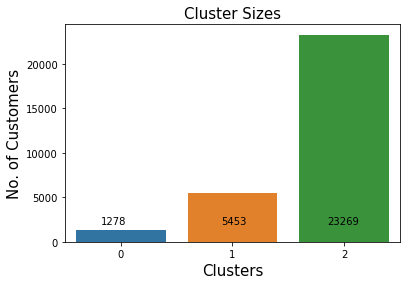

In [53]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.show()